In [2]:
import base64

with open("smart-waste-management.jpg", "rb") as img_file:
    img_base64 = base64.b64encode(img_file.read()).decode()


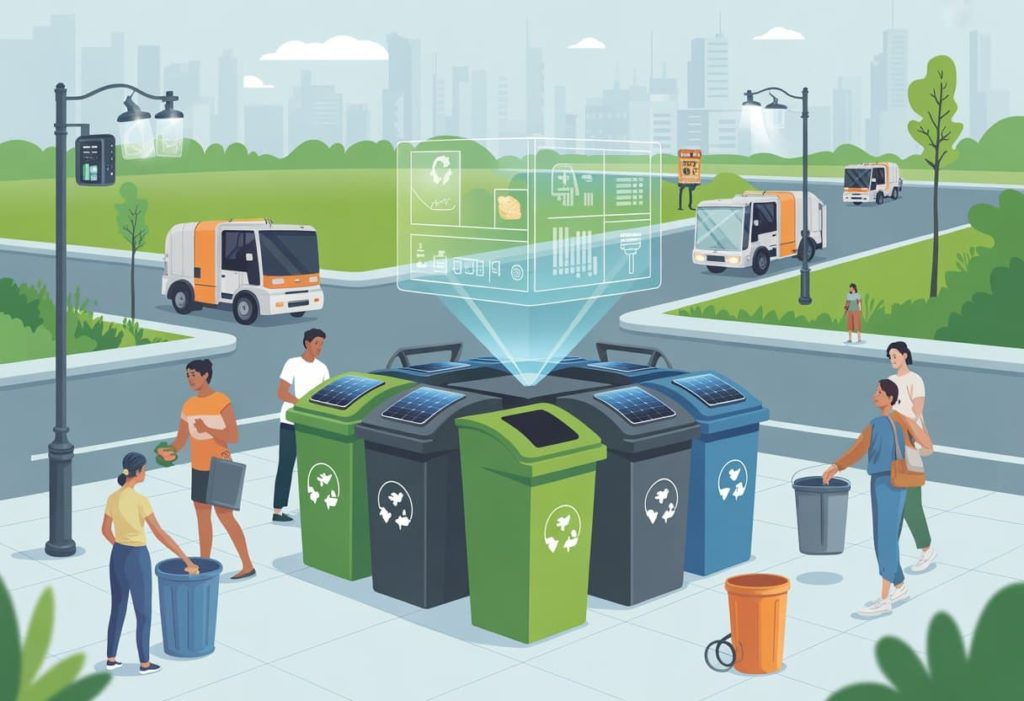

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import HTML, display

# -------------------------------
# CREATE DATASET
# -------------------------------
data = {
    "previous_fill": [30, 45, 65, 20, 80, 40, 55, 70, 25, 90],
    "people_count": [120, 150, 180, 100, 220, 130, 160, 200, 110, 250],
    "temperature": [32, 34, 35, 30, 36, 31, 33, 37, 29, 38],
    "fill_level": [45, 65, 85, 35, 95, 55, 75, 90, 40, 98]
}

df = pd.DataFrame(data)

# -------------------------------
# TRAIN MODEL
# -------------------------------
X = df[["previous_fill", "people_count", "temperature"]]
y = df["fill_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# PREDICTION FUNCTION
# -------------------------------
def predict_fill(previous_fill, people_count, temperature):
    input_data = np.array([[previous_fill, people_count, temperature]])
    prediction = round(model.predict(input_data)[0], 2)
    return prediction

# -------------------------------
# HTML WEB UI
# -------------------------------
html_code = f"""
<style>
        body {{
            margin: 0;
            height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;

            /* Background image */
            background-image: url("data:image/jpg;base64,{img_base64}");
            background-size: cover;
            background-position: center;

            font-family: Arial, sans-serif;
        }}
        .wrapper {{
            width: 100%;
            height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
          }}

        .container {{
            width: 400px;
            padding: 25px;
            display:flex ;
            flex-direction: column;
            gap:10px;
            border-radius: 12px;
            background-color:rgb(141, 189, 141);
            box-shadow: 0 8px 20px rgba(0,0,0,0.15);
        }}

        h2 {{
            text-align: center;
            color: #2c6e49;
        }}

        label {{
            font-weight: 600;
            color: #333;
        }}

        input {{
            width: 100%;
            padding: 8px;
            margin-top: 5px;
            border-radius: 6px;
            border: 1px solid #ccc;
        }}

        button {{
            width: 100%;
            padding: 10px;
            margin-top: 15px;
            border: none;
            border-radius: 8px;
            background-color: #b5e487;
            color: #003049;
            font-size: 15px;
            font-weight: bold;
            cursor: pointer;
        }}

        button:hover {{
            background-color:rgb(6, 197, 6);
        }}

        #output {{
            margin-top: 20px;
            font-weight: bold;
            text-align: center;
            color: #1b4332;
        }}
        button:focus{{
            border:2px solid black;
        }}
    </style>
</head>

<body>
<div class="wrapper">
<div class="container">
    <h2>AI Smart Waste Management System</h2>

    <label>Previous Bin Fill Level (%)</label>
    <input type="number" id="prev">

    <label>People Count</label>
    <input type="number" id="people">

    <label>Temperature (°C)</label>
    <input type="number" id="temp">

    <button onclick="sendData()">Predict Bin Fill Level</button>

    <p id="output"></p>
</div>
</div>

<script>
function sendData() {{
    let prev = document.getElementById("prev").value;
    let people = document.getElementById("people").value;
    let temp = document.getElementById("temp").value;

    google.colab.kernel.invokeFunction(
        'predict',
        [prev, people, temp],
        {{}}
    );
}}
</script>

"""
display(HTML(html_code))

# -------------------------------
# COLAB CALLBACK
# -------------------------------
from google.colab import output

def predict(prev, people, temp):
    prev = float(prev)
    people = int(people)
    temp = float(temp)

    result = predict_fill(prev, people, temp)

    if result > 80:
        message = f"⚠ Predicted Fill Level: {result}% – Immediate waste collection required!"
    else:
        message = f"✅ Predicted Fill Level: {result}% – Bin status normal."

    display(HTML(f"<script>document.getElementById('output').innerHTML='{message}';</script>"))

output.register_callback('predict', predict)